# Predicting Campus Recruitement using maching learning

>This notebook looks into using various python based machine learning and data science 
librarires in an attempt to build a machine learning model capable of predicting whether or
not someone has get placed or not based on there educational background and many other factors

<img src="images/6step.png"/>

We are going take following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination
In a statement,
>Given the educational parameters about a student,can we predict wheather or not student get placed or not

## 2. Data
>This data set is available on Kaggle.https://www.kaggle.com/benroshan/factors-affecting-campus-placement
    
## 3.Evaluation
>If we can reach 90% accuracy at predicting wheater or not a student got placed or not.

## 4. Features and Description
0. sl_no  -  Serial Number
1. gender -  Candidate gender → Male= ‘M’ (or) Female= ‘F’
2. ssc_p  -  10th Percentage
3. ssc_b  -  SSC Board of Education → Central (or) Others
4. hsc_p  -  12th percentage
5. hsc_b  -  HSC Board of Education → Central (or) Others
6. hsc_s  -  Specialization in HSC
7. degree_p - Degree Percentage
8. degree_t - Under Graduation (Degree type), Field of degree education
9. workex   - Work Experience → Yes (or) No
10. etest_p - Employability test percentage (conducted by the college)
11.specialisation - Post Graduation(MBA)- Specialization
12. mba_p   - MBA percentage
13. status - Status of placement → Placed (or) Not placed
14. salary - Salary offered by corporate to candidates

## 5.Modelling
> Here we will will try to choose a model which fits best for our data set wether it's a classification model or regression model we try to use scikit learn map.https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 6.Experimentation
> Now after getting the score from our model we will  try to improve the score by hypertuning the parameters of our model.We will try to get the best score possible.

In [216]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from scikit.learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor


# Model eavaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# Campus Recruitement

<img src = "images/campus.jpg"/>

Campus placement or campus recruiting is a program conducted within universities or other educational institutions to provide jobs to students nearing completion of their studies. In this type of program, the educational institutions partner with corporations who wish to recruit from the student population.

**Context of our Dataset**: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

In [217]:
# Importing data set in our notebook

df = pd.read_csv("Placement_Data_Full_Class.csv")
df.shape #(rows,column)

(215, 15)

In [218]:
df = df.drop("sl_no",axis = 1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [219]:
df.head() # Top 5 rows and column

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [220]:
df.tail() # Bottom 5 rows and column

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [221]:
df["status"].value_counts() # we will understand it more clearly by visulaizing it

Placed        148
Not Placed     67
Name: status, dtype: int64

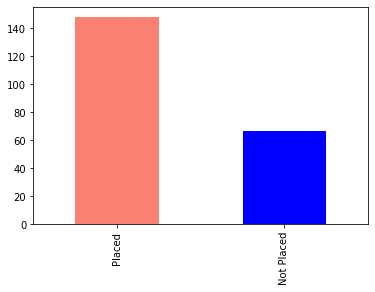

In [222]:
df["status"].value_counts().plot(kind = "bar",color = ["salmon","blue"]);

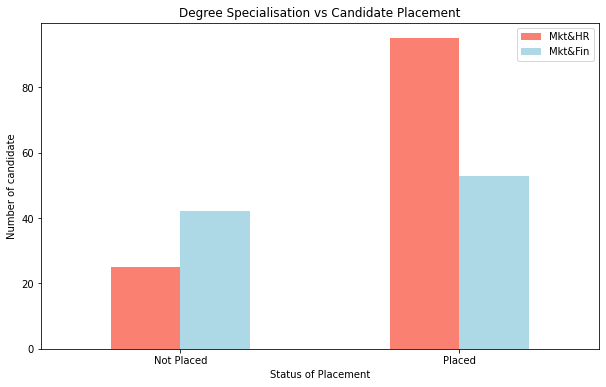

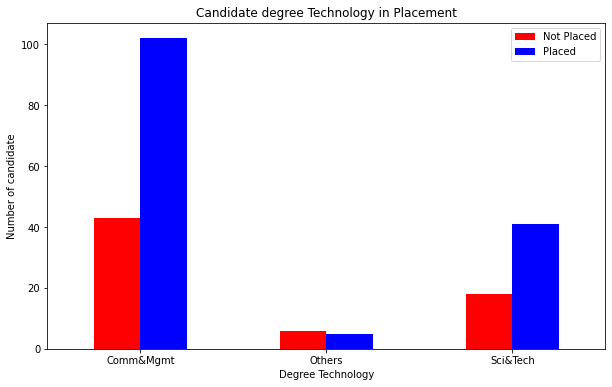

In [223]:
pd.crosstab(df["status"],df["specialisation"]).plot(kind = "bar",color = ["salmon","lightblue"],figsize = (10,6));
plt.legend(["Mkt&HR","Mkt&Fin"]);
plt.title("Degree Specialisation vs Candidate Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate");
plt.xticks(rotation = 0);

pd.crosstab(df["degree_t"],df["status"]).plot(kind = "bar",color = ["red","blue"],figsize = (10,6));
plt.legend(["Not Placed","Placed"]);
plt.title("Candidate degree Technology in Placement")
plt.xlabel("Degree Technology")
plt.ylabel("Number of candidate");
plt.xticks(rotation = 0);

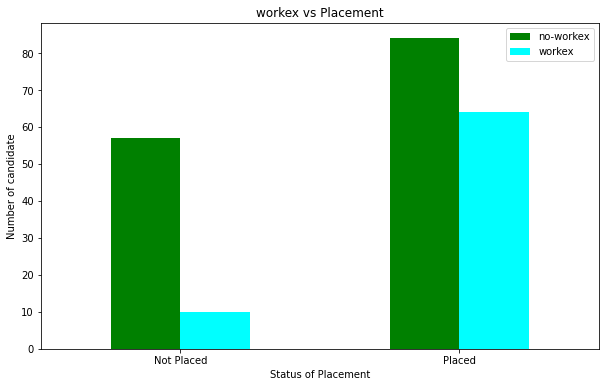

In [224]:
pd.crosstab(df["status"],df["workex"]).plot(kind = "bar",color = ["green","cyan"],figsize = (10,6));
plt.legend(["no-workex","workex"]);
plt.title("workex vs Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate");
plt.xticks(rotation = 0);

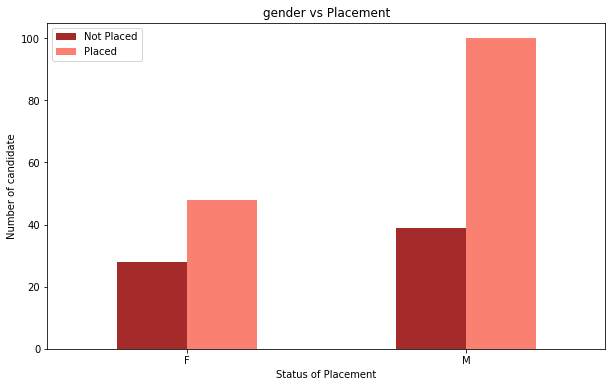

In [225]:
pd.crosstab(df["gender"],df["status"]).plot(kind = "bar",color = ["brown","salmon"],figsize = (10,6));
plt.legend(["Not Placed","Placed"]);
plt.title("gender vs Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate");
plt.xticks(rotation = 0);

### From above we get following information

1. Students have a greater chance of getting placed if they do there mba in Mkt&Hr rather than Mkt&Fin
2. There are many candidates who haven't got placed when they don't have work experience
3. There is no discrimination on basis of gender
4. Comm&Mgmt student get most placed

# Cleanining of Data

In [226]:
# we try to find out misssing values in our dataset
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [227]:
# Oh we can see that salary column has 67 missing values so will we fill these rows with values 0]
# Fill the Salary column
df["salary"].fillna(0.0,inplace = True)
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [228]:
# first we will try to look at the data types of columns in our data set
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

We have 1 integer,5 float and 8 object datatypes in our dataset

### Now we will try to convert all the object dtypes to numerical values

*so first we will try to convert those object to numerical which have only 2 types of class for eg:

1. Gender - Male or Female
2. Workex - Y or N
3. Specialization - Mkt&Fin or Mkt&HR	
4. Status - Placed or Not
5. Ssc_b - Others or Central
6. Hsc_b - Others or Central

In [229]:
# We will be using Label encoding to convert two types of classes to '0' and '1'

# Importing Library
from sklearn.preprocessing import LabelEncoder

# object columns that we are changing
object_columns=['gender','workex','specialisation','status','ssc_b','hsc_b']

# Applying label encoder to each column 
label_encoder = LabelEncoder()
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


now we can see that we have changed the object columns to 0's and 1's

In [230]:
df.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s              object
degree_p          float64
degree_t           object
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
salary            float64
dtype: object

Still 2 object data types are these datatype have more than 2 class so in this we will be using dummies
These datatypes are:
1. hsc_s
2. degree_t

In [231]:
# So let's see hsc_s by dummies
df1 = pd.get_dummies(df['hsc_s'])
df1.head()

,Arts,Commerce,Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [232]:
# Now let's see degree_t by dummies
df2 = pd.get_dummies(df['degree_t'])
df2.head()

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [233]:
# Now we will try to concatenate these dummies into our actual dataset but first we will drop column 'hsc_s' and 'degree_t' because it doesn't any use of it now
df.drop("hsc_s", axis=1, inplace=True)
df.drop("degree_t", axis=1, inplace=True)
df.drop("salary",axis = 1,inplace = True)
frames = [df,df1,df2]
df = pd.concat(frames,axis = 1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [234]:
df.dtypes

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
degree_p          float64
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
status              int32
Arts                uint8
Commerce            uint8
Science             uint8
Comm&Mgmt           uint8
Others              uint8
Sci&Tech            uint8
dtype: object

**So Now we can see that we have converted all our data to numerical and we have also filled the missing values so our next step is to choose the right model for us for this we can use scikit learn map**

# # Building a Model

In [235]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [236]:
# Split the data
X = df.drop("status",axis = 1)
Y = df["status"]

In [237]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0


In [238]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int32

In [239]:
# Split the data into train and split
np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2)


Now we got our data split into training and test split it's time to build machine learning model

We will train it (find the patterns) on the training set and we will test it (use the pattern) on the test set

We are going to try 5 different machine learning models:

1. Logistic Regression
2. k-Nearest Neighbours Classifier
3. RandomForestClassifier
4. GaussianNaiveBayes
5. RandomForestRegressor

In [240]:
# Puts model in a dictionary
models =   {"Logistic Regression":LogisticRegression(),
           "K-neighborsClassifier":KNeighborsClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "GaussianNaiveBayes":GaussianNB(),
              "RandomForestRegressor":RandomForestRegressor()
             }


def fit_score(model,X_train,X_test,Y_train,Y_test):
  
    np.random.seed(42)

    model_score = {}

    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_score[name] = model.score(X_test,Y_test)
    
    return model_score

In [241]:
import warnings
warnings.filterwarnings('ignore')
model_scores = fit_score(model = models,
                          X_train = X_train,
                          X_test = X_test,
                          Y_train = Y_train,
                          Y_test = Y_test)
model_scores

{'Logistic Regression': 0.8837209302325582,
 'K-neighborsClassifier': 0.7906976744186046,
 'RandomForestClassifier': 0.7674418604651163,
 'GaussianNaiveBayes': 0.7209302325581395,
 'RandomForestRegressor': 0.2971580645161288}

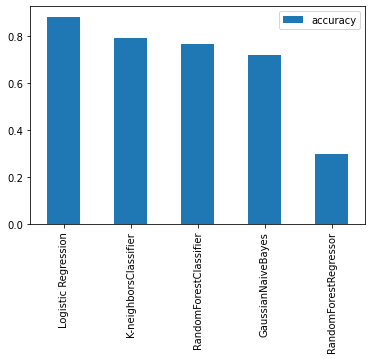

In [242]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model.. and we know model first prediction aren't always

# Hyperparameter tuning Randomized search CV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
* K-neighborsClassifier

using RandiomizedSearchCV

In [278]:
# Create a hyperparameter grid for logisticRegression

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 "penalty" :['none', 'l1', 'l2', 'elasticnet']}

In [284]:
# Tune logistic regresion
np.random.seed(42)

# Setup random hyperparameter search for logistic regresion
rs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid  = log_reg_grid,
                                cv = 5,
                                verbose = True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   21.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [285]:
rs_log_reg.best_params_


{'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'newton-cg'}

In [286]:
rs_log_reg.score(X_test,Y_test)

0.8837209302325582

In [247]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
            "max_depth":[None, 3, 5, 10],
            "min_samples_split":np.arange(2, 20, 2),
            "min_samples_leaf":np.arange(1, 20, 2)}

In [248]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [249]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [272]:
rs_rf.score(X_test,Y_test)

0.7441860465116279

In [257]:
# Create a hyperparameter grid for K-neighborsClassifier
grid_params = {"n_neighbors":[3,5,11],
           "weights":['uniform','distance'],
          }

In [258]:
# Tune  K-neighborsClassifier
np.random.seed(42)

# Setup random hyperparameter search for  K-neighborsClassifier
rs_kn = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions = grid_params,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

rs_kn.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [3, 5, 11],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [273]:
rs_kn.score(X_test,Y_test)

0.7906976744186046

# Observation 

from the above observation we can see that by hypertuning the paramaters 

* LogisticRegression: It has shown no improvement it's previous accuracy was 0.8837209302325582 and after hyperparameter tuning using gridsearchcv it's accuracy is 0.8837209302325582 it's same


* K-neighborsClassifier: This model has show a lot of improvement it's accuracy has increased from  0.7906976744186046 to 0.872093023255814 improvement of 8% that's great


* RandomForestClassifier: This is best model we have seen so far it's accuracy has increased from 0.7674418604651163 to 0.9302325581395349 improvement of 17% that really amazing we have found our best model


# Feature Importance

Feature importance is another as asking , which features contribute most to the outcomes of the model and how do they contribute?

Let's find feature importance of Random forest classifier(our best model)

In [268]:
#Fit an instance of logistic regression
clf = RandomForestClassifier(n_estimators = 710,
                          min_samples_split= 16,
                         min_samples_leaf = 3,
                         max_depth = 10)
clf.fit(X_train,Y_train);

0.7441860465116279

In [269]:
# Match coef of different features to column
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'